In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("heart_disease_ds.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
new_df=df.copy()
# creating a copy of dataset so that will not affect our original dataset.

In [6]:
new_df = new_df.rename(columns={'condition':'target'})
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [11]:
new_df.isnull().values.any()
# No missing Values in the dataset

False

In [13]:
new_df.nunique()
# lets find unique values in dataset using nunique() method. it exclude NA values by default.

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

## EDA


In [14]:
new_df['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [15]:
#Percentage of patients have and do not have heart disease
# To check wheather the dataset is balanced or not
new_df['target'].value_counts()/new_df.shape[0]*100


target
0    53.872054
1    46.127946
Name: count, dtype: float64

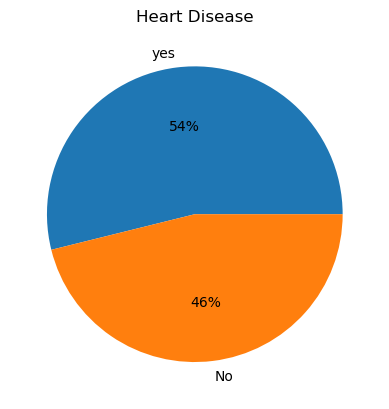

In [16]:
labels = ['yes', 'No']
values = new_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()
# Allmost balanced

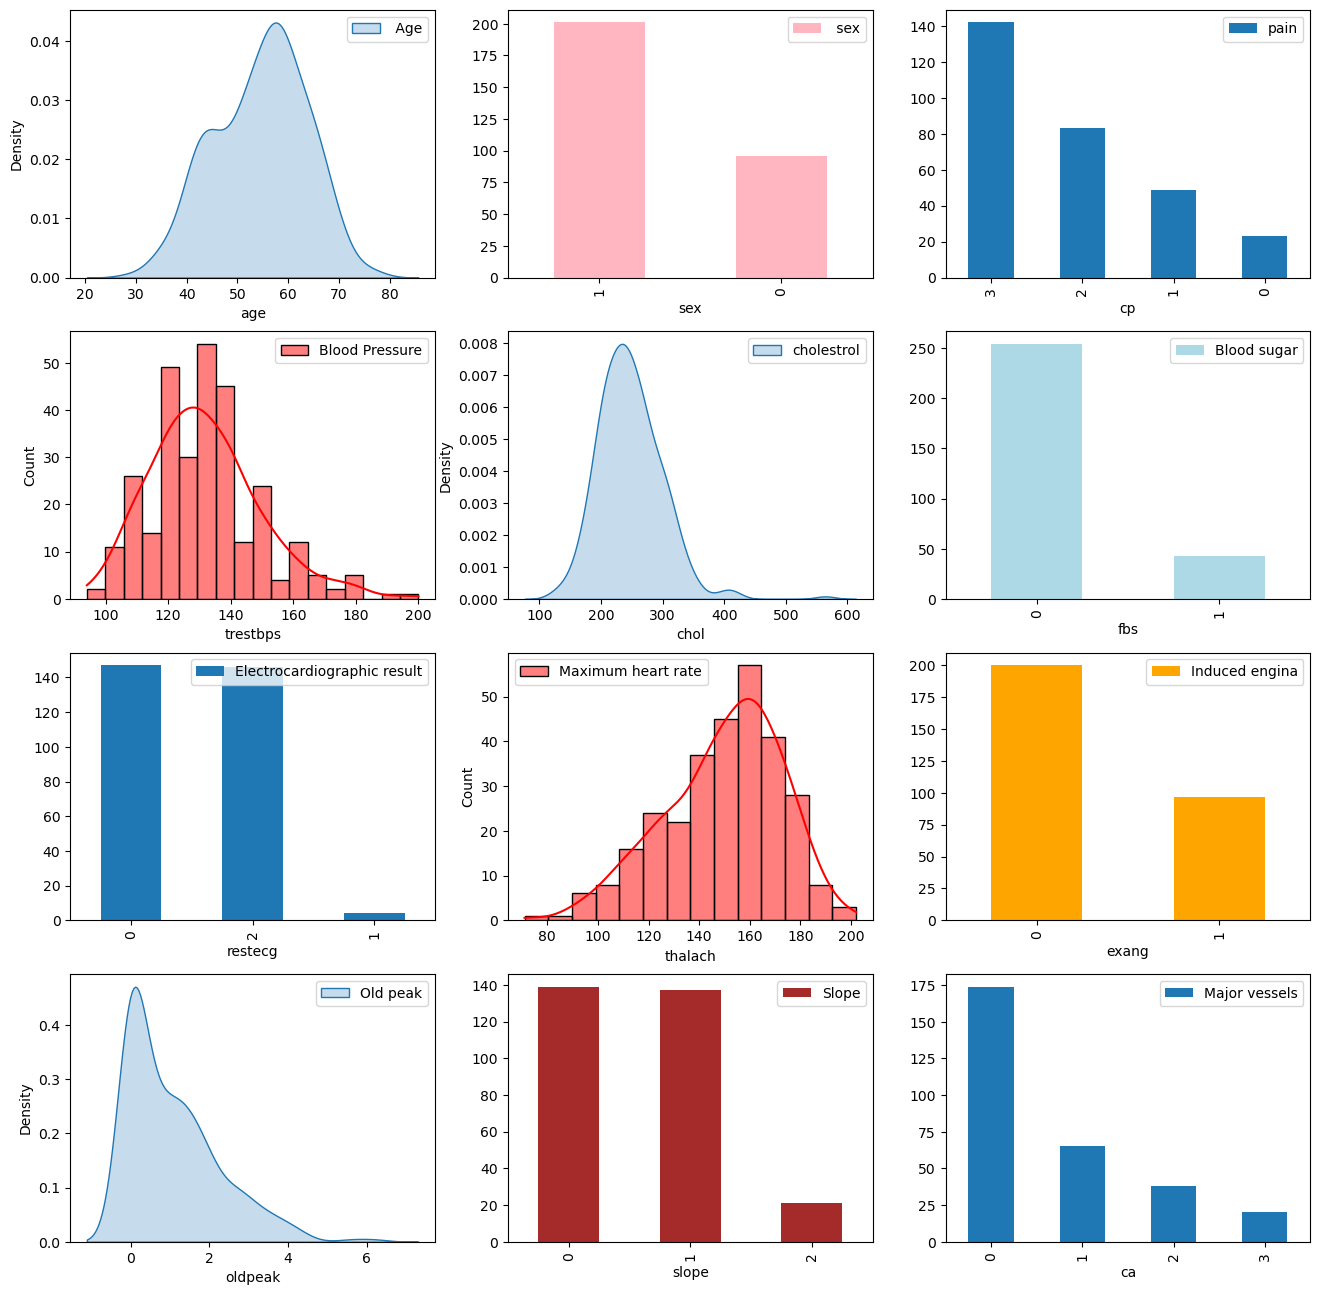

In [24]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(new_df['age'],fill=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
new_df['sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
new_df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],fill=True,label='blood pressure')
sns.histplot(new_df['trestbps'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(new_df['chol'],fill=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
new_df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
new_df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('restecg')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],fill=True,label='Maximum heart rate')
sns.histplot(new_df['thalach'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
new_df['exang'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(new_df['oldpeak'],fill=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
new_df['slope'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
new_df['ca'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
#plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

Most of the people have age between 50-60, are male, have less chest pain, blood pressure between 120 to 140, cholestrol between 200-300, blood sugar less than 120 and heart rate between 150-175.

## Distribution of features w.r.t target

#### Age distribution on heart disease

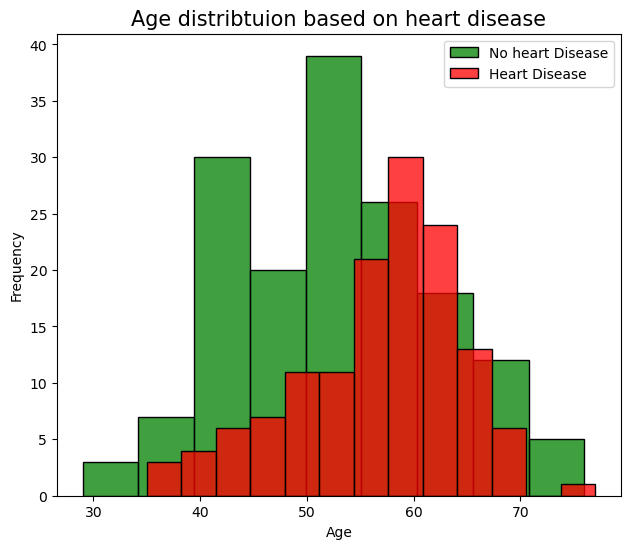

In [27]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.histplot(new_df[new_df['target'] == 0]["age"], color='green',label='No heart Disease')
sns.histplot(new_df[new_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()


In [28]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(new_df[new_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(new_df[new_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', new_df[new_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [29]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(new_df[new_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(new_df[new_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', new_df[new_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.75912408759124


From above plot we can infer that People having age 40-75 are more likely to have heart disease.

### Heart disease frequency according to chest pain types


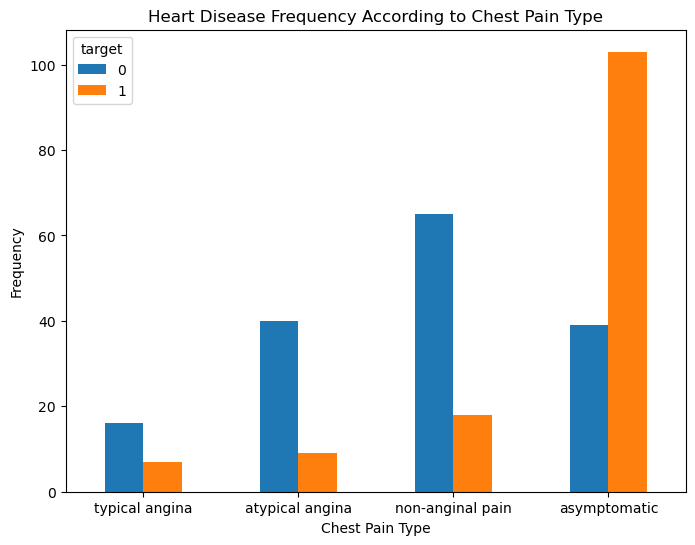

In [30]:
pd.crosstab(new_df.cp,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()



We can see that most of the people with the heart disease have asymptomatic chest pain.

#### Blood pressure distribution based on heart rate

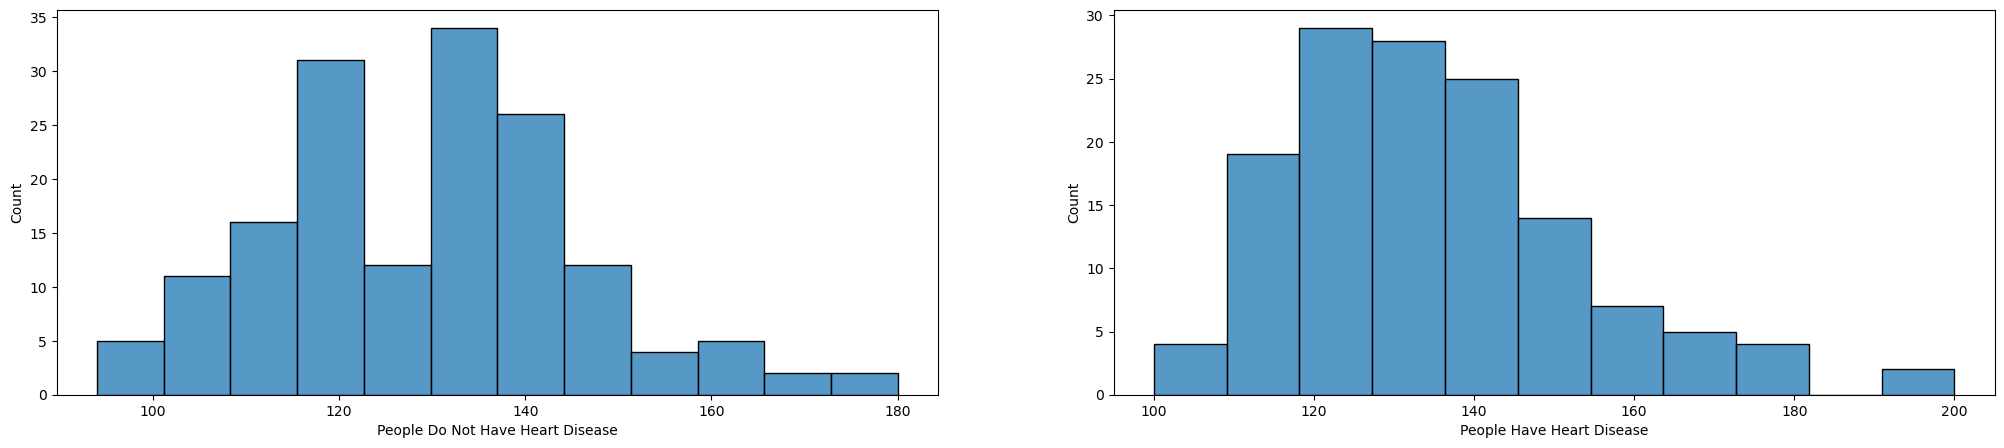

In [34]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.histplot(new_df[new_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.histplot(new_df[new_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()


In [32]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(new_df[new_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(new_df[new_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', new_df[new_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.175


In [33]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(new_df[new_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(new_df[new_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', new_df[new_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.63503649635035


People having blood pressure between 110 to 140 are more likely to have a heart attack

#### Cholesterol distribution based on heart disease

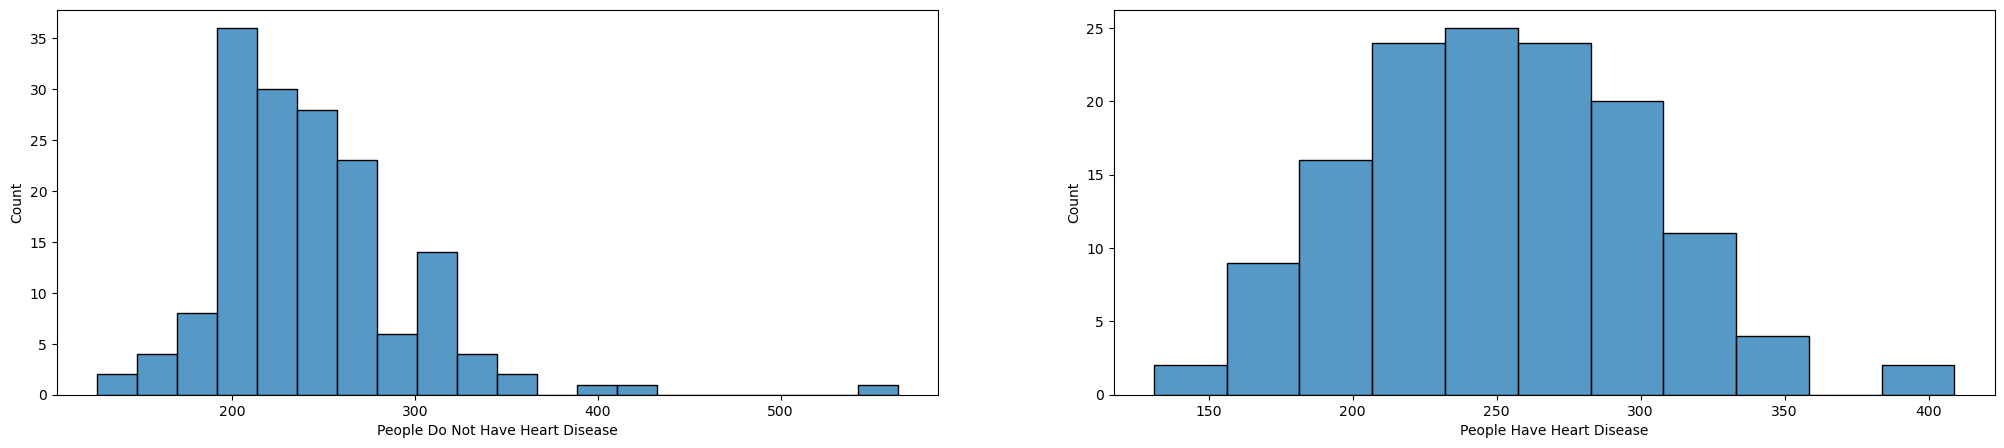

In [35]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.histplot(new_df[new_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.histplot(new_df[new_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [36]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(new_df[new_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(new_df[new_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', new_df[new_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  243.49375


In [37]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(new_df[new_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(new_df[new_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', new_df[new_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.85401459854015


#### Heart Disease Frequency According to Fasting Blood Sugar

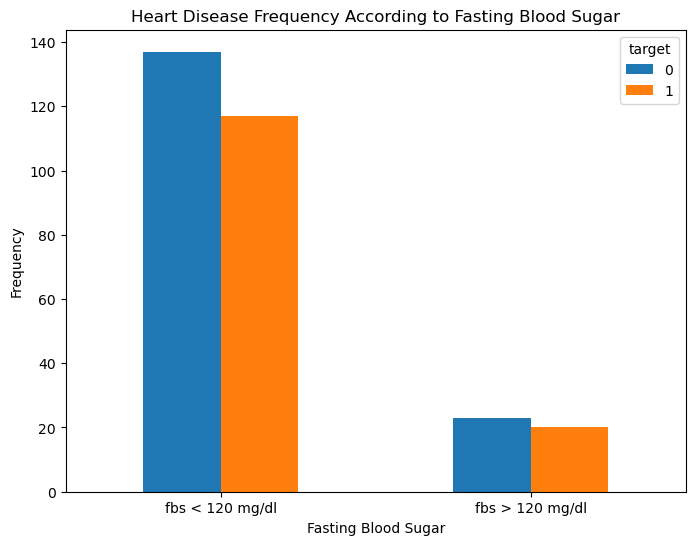

In [38]:
pd.crosstab(new_df.fbs,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

#### Heart Disease Frequency According to Resting Electrocardiographic Results

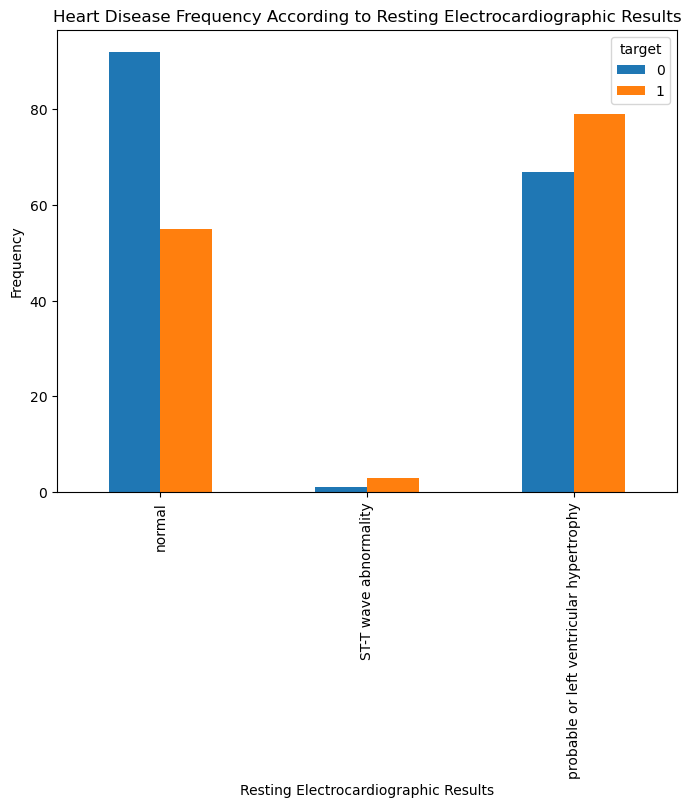

In [39]:
pd.crosstab(new_df.restecg,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

#### Maximum heart rate distribution based on heart disease

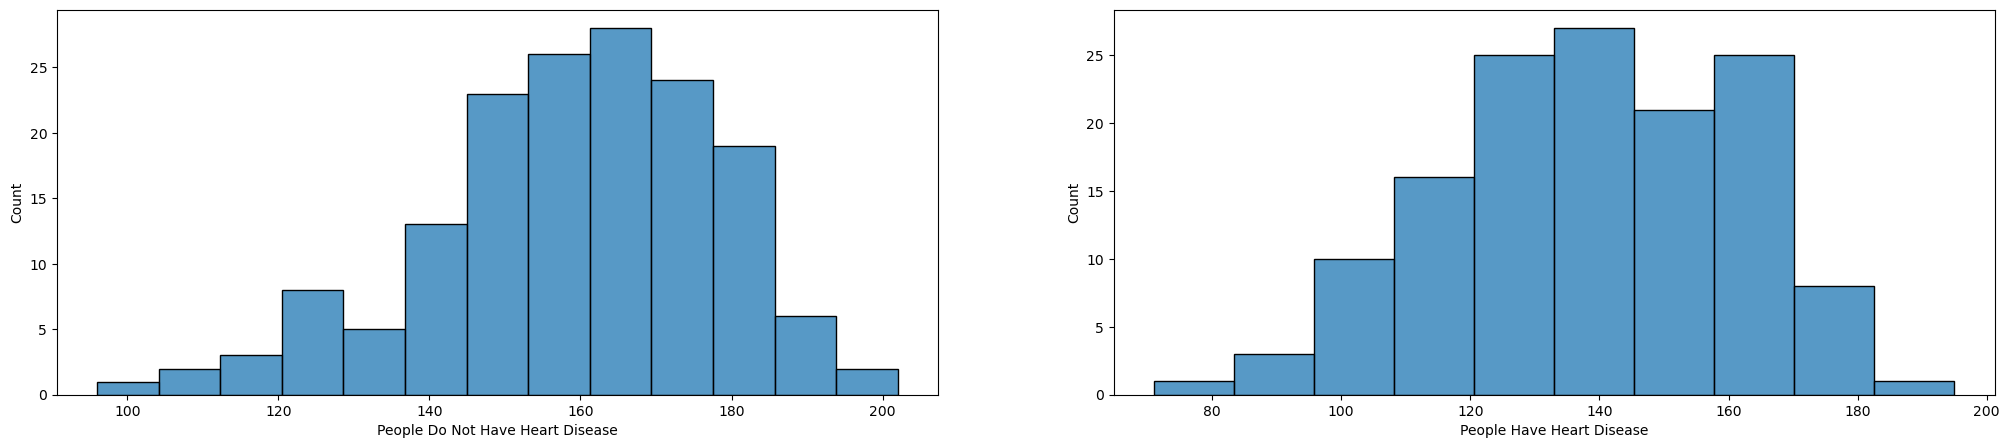

In [40]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.histplot(new_df[new_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.histplot(new_df[new_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

The people who have high heart rate greater than 150 are more likely to have heart disease.

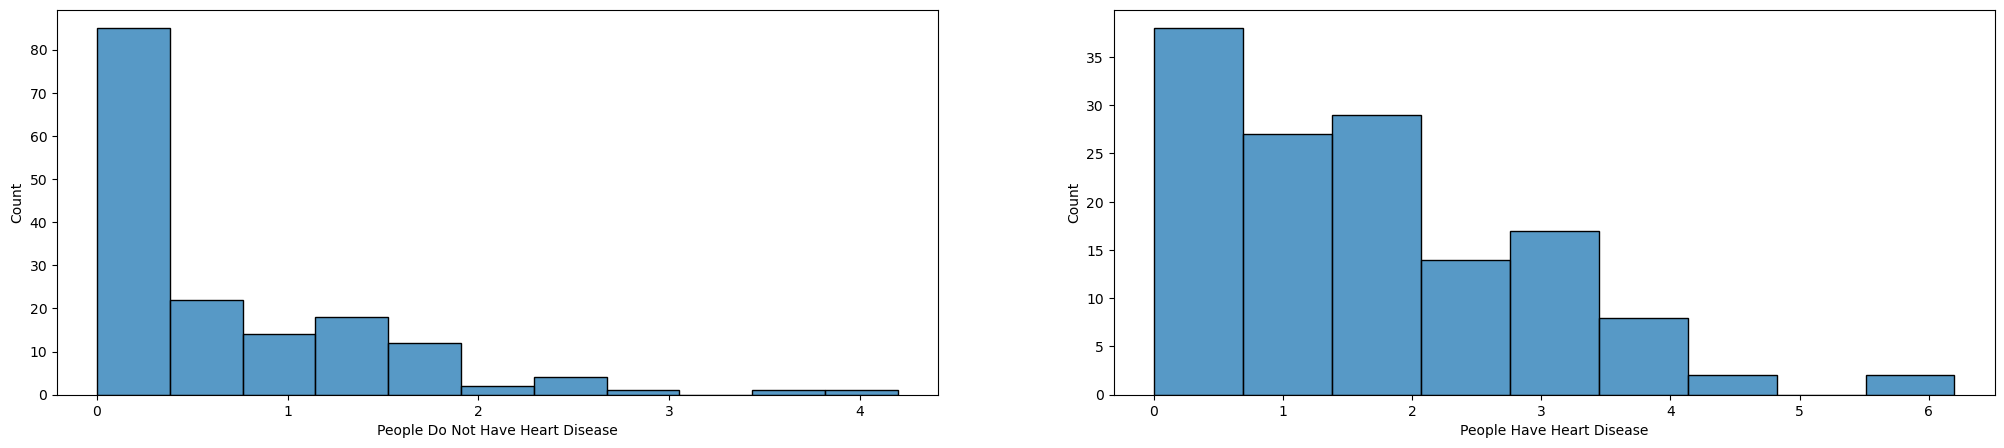

In [41]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.histplot(new_df[new_df['target'] == 0]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.histplot(new_df[new_df['target'] == 1]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [42]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(new_df[new_df['target'] == 0]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(new_df[new_df['target'] == 0]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', new_df[new_df['target'] == 0]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.5987500000000001


In [43]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(new_df[new_df['target'] == 1]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(new_df[new_df['target'] == 1]['oldpeak']))
print('Average ST depression of people not have heart disease: ', new_df[new_df['target'] == 1]['oldpeak'].mean())



Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.5890510948905108


#### Heart Disease Frequency According to Exercise Induced Angina

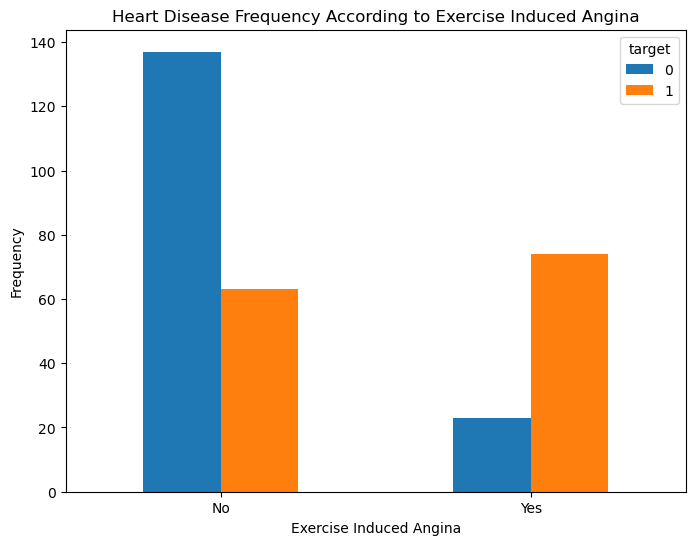

In [44]:
pd.crosstab(new_df.exang,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

#### Slope of the peak exercise ST segment based on the target

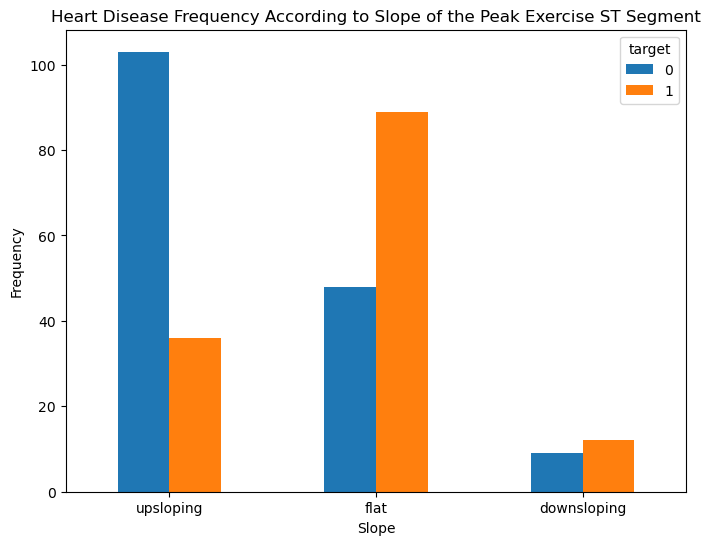

In [45]:
pd.crosstab(new_df.slope,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

As we can see that,the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

#### Heart Disease Frequency According to Thalassemia

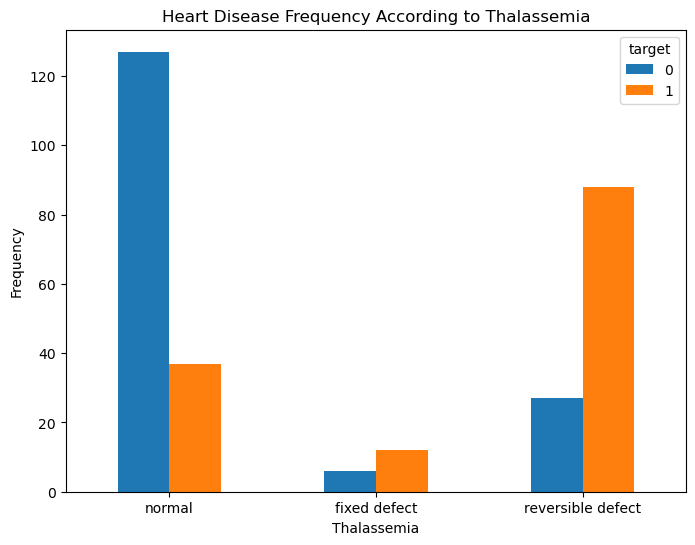

In [46]:
pd.crosstab(new_df.thal,new_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

People with reversible defect are more likely to have heart disease.

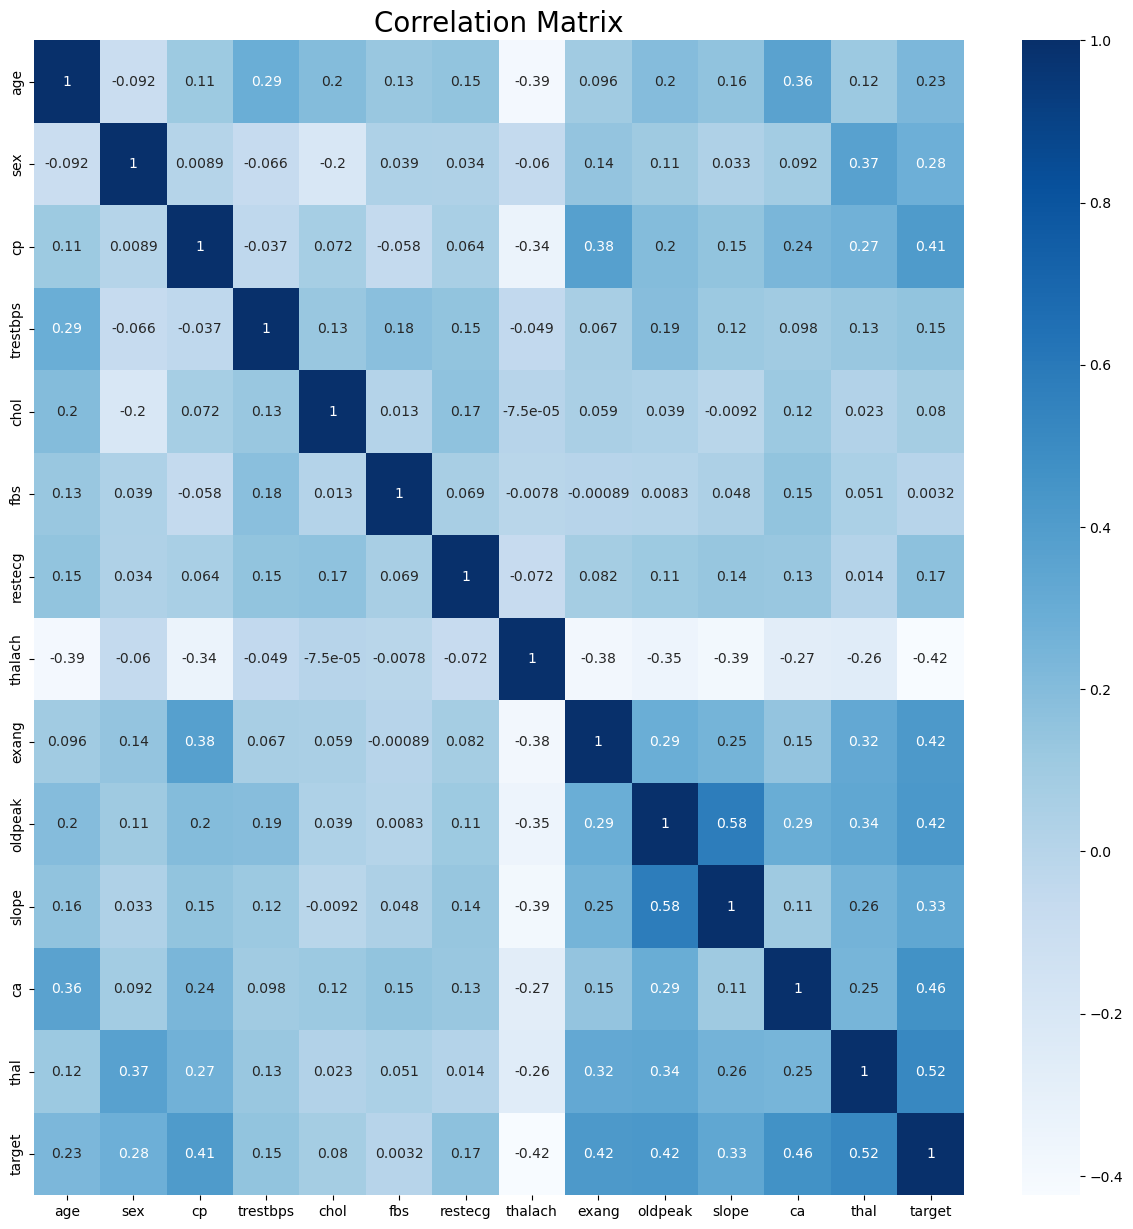

In [55]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(new_df.corr(), annot = True,cmap="Blues" )
plt.show()

From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels (0-3) colored by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly. We see also that there is an inverse proportion between the heart disease and maximum heart rate (thalch).

We can see also, there are a relation between the following attributes:

- The number of major vessels (0-3) colored by flourosopy (ca) and the age.
- ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
- The chest pain type (cp), exercise induced angina (exang).
- maximum heart rate (thalch) and the age.

# Model Building and Training

In [57]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
from sklearn.model_selection import train_test_split
x= new_df.drop(columns= 'target')
y= new_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (207, 13), X_test size: (90, 13)


30% for testing and the rest 70% is for training the model.

In [59]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

In [60]:
# creating Knn Model
from sklearn.neighbors import KNeighborsClassifier
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.7888888888888889

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80        48
           1       0.78      0.76      0.77        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90

Accuracy: 78.89%



In [62]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[39,  9],
       [10, 32]], dtype=int64)

In [63]:
import pickle
file_path = 'heart_knn.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(Knn_model, file)

In [70]:
model = open('heart_knn.pkl','rb')
forest = pickle.load(model)